# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (50, 30)

### Грузим данные

Считаем описание данных

In [2]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [3]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [4]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [5]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15223 entries, 0 to 15222
Data columns (total 52 columns):
AGREEMENT_RK                  15223 non-null int64
TARGET                        15223 non-null int64
AGE                           15223 non-null int64
SOCSTATUS_WORK_FL             15223 non-null int64
SOCSTATUS_PENS_FL             15223 non-null int64
GENDER                        15223 non-null int64
CHILD_TOTAL                   15223 non-null int64
DEPENDANTS                    15223 non-null int64
EDUCATION                     15223 non-null object
MARITAL_STATUS                15223 non-null object
GEN_INDUSTRY                  13856 non-null object
GEN_TITLE                     13856 non-null object
ORG_TP_STATE                  13856 non-null object
ORG_TP_FCAPITAL               13858 non-null object
JOB_DIR                       13856 non-null object
FAMILY_INCOME                 15223 non-null object
PERSONAL_INCOME               15223 non-null object
REG_ADDRESS_PRO

In [7]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [8]:
df_train.TARGET.count()

15223

In [9]:
df_train.TARGET.mean() #количество клиентов, откликнувшихся на письмо в ~8.5 раз меньше, поэтому я увеличил выборку клиентов с TARGET == 1, продублировав записи N раз. ROC AUC на тесте получился максимальным при N = 6. 

0.1190304145043684

In [10]:
df_train = df_train.append(df_train[df_train.TARGET == 1]).append(df_train[df_train.TARGET == 1]).append(df_train[df_train.TARGET == 1]).append(df_train[df_train.TARGET == 1]).append(df_train[df_train.TARGET == 1])

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24283 entries, 0 to 15213
Data columns (total 52 columns):
AGREEMENT_RK                  24283 non-null int64
TARGET                        24283 non-null int64
AGE                           24283 non-null int64
SOCSTATUS_WORK_FL             24283 non-null int64
SOCSTATUS_PENS_FL             24283 non-null int64
GENDER                        24283 non-null int64
CHILD_TOTAL                   24283 non-null int64
DEPENDANTS                    24283 non-null int64
EDUCATION                     24283 non-null object
MARITAL_STATUS                24283 non-null object
GEN_INDUSTRY                  22666 non-null object
GEN_TITLE                     22666 non-null object
ORG_TP_STATE                  22666 non-null object
ORG_TP_FCAPITAL               22668 non-null object
JOB_DIR                       22666 non-null object
FAMILY_INCOME                 24283 non-null object
PERSONAL_INCOME               24283 non-null object
REG_ADDRESS_PRO

## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [12]:
df_train['sample'] = 'train'
df_test['sample'] = 'test'
#df_train.loc[:, 'sample'] = 'train'
#df_test.loc[:, 'sample'] = 'test'

In [13]:
df = df_test.append(df_train).reset_index(drop=True)

In [14]:
df

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED,sample
0,59909969,0,30,1,0,1,1,1,Среднее специальное,Не состоял в браке,...,1,2,2,8,0,0,0,0,NaN,test
1,59910420,0,48,0,1,1,0,0,Среднее,Состою в браке,...,0,2,1,15,0,0,0,0,NaN,test
2,59911223,0,35,1,0,0,1,0,Среднее,Не состоял в браке,...,1,1,1,1,0,0,0,0,NaN,test
3,59911322,0,22,1,0,0,0,0,Среднее,Не состоял в браке,...,1,3,2,9,0,0,0,0,NaN,test
4,59911438,0,27,1,0,1,2,2,Высшее,Состою в браке,...,1,1,1,5,0,0,0,0,NaN,test
5,59911769,0,44,0,1,0,2,2,Среднее специальное,Состою в браке,...,0,1,1,5,0,0,0,0,NaN,test
6,59912044,0,57,1,0,1,0,0,Среднее,Не состоял в браке,...,1,3,3,14,0,0,0,0,NaN,test
7,59912382,0,33,1,0,1,2,2,Среднее специальное,Разведен(а),...,1,1,1,5,0,0,0,0,NaN,test
8,59912422,0,53,0,1,1,2,0,Среднее специальное,Состою в браке,...,0,1,1,4,0,0,0,0,NaN,test
9,59912485,1,33,1,0,0,1,0,Неполное среднее,Состою в браке,...,1,1,1,6,0,0,0,0,NaN,test


### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39193 entries, 0 to 39192
Data columns (total 53 columns):
AGREEMENT_RK                  39193 non-null int64
TARGET                        39193 non-null int64
AGE                           39193 non-null int64
SOCSTATUS_WORK_FL             39193 non-null int64
SOCSTATUS_PENS_FL             39193 non-null int64
GENDER                        39193 non-null int64
CHILD_TOTAL                   39193 non-null int64
DEPENDANTS                    39193 non-null int64
EDUCATION                     39193 non-null object
MARITAL_STATUS                39193 non-null object
GEN_INDUSTRY                  36230 non-null object
GEN_TITLE                     36230 non-null object
ORG_TP_STATE                  36230 non-null object
ORG_TP_FCAPITAL               36235 non-null object
JOB_DIR                       36230 non-null object
FAMILY_INCOME                 39193 non-null object
PERSONAL_INCOME               39193 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [16]:
for i in df.columns: # перебираем все столбцы
    if str(df[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Высшее', 'Неоконченное высшее', 'Неполное среднее', 'Среднее', 'Среднее специальное', 'Два и более высших образования', 'Ученая степень'}


MARITAL_STATUS
{'Разведен(а)', 'Гражданский брак', 'Не состоял в браке', 'Вдовец/Вдова', 'Состою в браке'}


GEN_INDUSTRY
{nan, 'Недвижимость', 'Коммунальное хоз-во/Дорожные службы', 'Логистика', 'Нефтегазовая промышленность', 'Здравоохранение', 'Металлургия/Промышленность/Машиностроение', 'ЧОП/Детективная д-ть', 'Сборочные производства', 'Салоны красоты и здоровья', 'Подбор персонала', 'Развлечения/Искусство', 'Химия/Парфюмерия/Фармацевтика', 'Банк/Финансы', 'Транспорт', 'Туризм', 'Энергетика', 'Наука', 'Ресторанный бизнес/Общественное питание', 'Управляющая компания', 'Сельское хозяйство', 'Информационные услуги', 'Юридические услуги/нотариальные услуги', 'Государственная служба', 'Строительство', 'Образование', 'Страхование', 'Информационные технологии', 'СМИ/Реклама/PR-агенства', 'Маркетинг', 'Торговля', 'Другие сферы'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [17]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float') #.map(lambda x: x.replace(',', '.'))

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
39163    20000.0
39164    25000.0
39165    20000.0
39166    25000.0
39167    15000.0
39168    20000.0
39169    14300.0
39170    35000.0
39171     8000.0
39172     5000.0
39173    14000.0
39174    15000.0
39175    10000.0
39176     8100.0
39177     9000.0
39178    15000.0
39179    35000.0
39180    18000.0
39181     9000.0
39182    20000.0
39183    10000.0
39184    10000.0
39185    25000.0
39186     7000.0
39187    12000.0
39188    15000.0
39189     8000.0
39190     7000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

Есть сегмент клиентов, у которых не заполнены следующие поля:

GEN_INDUSTRY                  27420 non-null object    отрасль работы клиента

GEN_TITLE                     27420 non-null object    должность

ORG_TP_STATE                  27420 non-null object    форма собственности компании

ORG_TP_FCAPITAL               27425 non-null object    отношение к иностранному капиталу

JOB_DIR                       27420 non-null object    направление деятельности внутри компании

WORK_TIME                     27416 non-null float64   время работы на текущем месте (в месяцах)

Количество пропусков и дополнительная проверка показывает, что это действительно сегмент клиентов с пропусками всех этих полей. Я построю модель, исключив этих клиентов. После чего добавлю клиентов в датафрейм и посмотрю, как изменится результат.

UPD: вернул этих клиентов в выборку, итоговый ROC AUC изменился незначительно.


In [18]:
#df = df[df.WORK_TIME.notnull()]


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39193 entries, 0 to 39192
Data columns (total 53 columns):
AGREEMENT_RK                  39193 non-null int64
TARGET                        39193 non-null int64
AGE                           39193 non-null int64
SOCSTATUS_WORK_FL             39193 non-null int64
SOCSTATUS_PENS_FL             39193 non-null int64
GENDER                        39193 non-null int64
CHILD_TOTAL                   39193 non-null int64
DEPENDANTS                    39193 non-null int64
EDUCATION                     39193 non-null object
MARITAL_STATUS                39193 non-null object
GEN_INDUSTRY                  36230 non-null object
GEN_TITLE                     36230 non-null object
ORG_TP_STATE                  36230 non-null object
ORG_TP_FCAPITAL               36235 non-null object
JOB_DIR                       36230 non-null object
FAMILY_INCOME                 39193 non-null object
PERSONAL_INCOME               39193 non-null object
REG_ADDRESS_PRO

Пропуски в полях:
    
    TP_PROVINCE                   26842 non-null object    область торговой точки, где клиент брал последний кредит
    
    REGION_NM                     27414 non-null object    регион РФ

Заполню нулями, т.к. поле TP_PROVINCE - единственное незаполненное поле у части клиентов (~600 человек), REGION_NM не заполнено всего у двух.
Т.е. этих клиентов можно оставить в выборке, заполнение этих полей нулями не должно сказаться на качестве модели.

PREVIOUS_CARD_NUM_UTILIZED    558 non-null float64     количество уже утилизированных карт (если пусто - 0)

Заполнить нулями, об этом сказано в описании поля.

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

Есть:
- EDUCATION
- MARITAL_STATUS
- GEN_INDUSTRY
- GEN_TITLE
- ORG_TP_STATE
- ORG_TP_FCAPITAL
- JOB_DIR
- FAMILY_INCOME
- REG_ADDRESS_PROVINCE
- FACT_ADDRESS_PROVINCE
- POSTAL_ADDRESS_PROVINCE
- TP_PROVINCE
- REGION_NM

Сделать get_dummies

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [20]:
def preproc_data(df_input):
    df_output = df_input.copy()
    df_output = df_output.drop(['AGREEMENT_RK'], axis=1)
    df_output['PERSONAL_INCOME'] = df_output['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['CREDIT'] = df_output['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['FST_PAYMENT'] = df_output['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_AVG_DLQ_AMT'] = df_output['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_MAX_DLQ_AMT'] = df_output['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    
    df_output['PREVIOUS_CARD_NUM_UTILIZED'] = df_output['PREVIOUS_CARD_NUM_UTILIZED'].fillna(0)
    #df_output['GEN_INDUSTRY'] = df_output['GEN_INDUSTRY'].fillna(0)
    #df_output['GEN_TITLE'] = df_output['GEN_TITLE'].fillna(0)
    #df_output['ORG_TP_STATE'] = df_output['ORG_TP_STATE'].fillna(0)
    #df_output['ORG_TP_FCAPITAL'] = df_output['ORG_TP_FCAPITAL'].fillna(0)
    #df_output['JOB_DIR'] = df_output['JOB_DIR'].fillna(0)
    df_output['WORK_TIME'] = df_output['WORK_TIME'].fillna(0)
    
    df_output = pd.get_dummies(df_output, columns=['EDUCATION', 'MARITAL_STATUS', 'GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 'FAMILY_INCOME'])
    df_output = df_output.drop(['REGION_NM', 'TP_PROVINCE', 'POSTAL_ADDRESS_PROVINCE','REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE'], axis=1)
    # в финальном варианте попробовал удалить все регионы, т.к. get_dummies c этими столбцами увеличивает таблицу до 440 столбцов.
    
    return df_output

In [21]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1).reset_index(drop = True)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1).reset_index(drop = True)

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [22]:
y = df_train_preproc['TARGET']
X = df_train_preproc.drop(['TARGET'], axis=1)
y_test = df_test_preproc.TARGET
X_test = df_test_preproc.drop(['TARGET'], axis=1)

#y = y.reset_index().TARGET
#y_test = y_test.reset_index().TARGET
#X = X.reset_index().drop(['index'], axis=1)
#X_test = X_test.reset_index().drop(['index'], axis=1)

#### Задание 5. Обучение и оценка качества разных моделей

In [23]:
from sklearn.model_selection import train_test_split
# test_size=0.3, random_state=42

## Your Code Here
X_train, X_test1, y_train, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Your Code Here

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
predict_dtc = dtc.predict(X_test1)
predict_dtc_proba = dtc.predict_proba(X_test1)

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predict_rfc = rfc.predict(X_test1)
predict_rfc_proba = rfc.predict_proba(X_test1)

lr = LogisticRegression()
lr.fit(X_train, y_train)
predict_lr = lr.predict(X_test1)
predict_lr_proba = lr.predict_proba(X_test1)

In [25]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

## Your Code Here
    
print('='*10)
print('DecisionTreeClassifier')
print('precision = {:.3%}'.format(precision_score(y_test1, predict_dtc)))
print('recall = {:.3%}'.format(recall_score(y_test1, predict_dtc)))
print('accuracy = {:.3%}'.format(accuracy_score(y_test1, predict_dtc)))
print('\n')

print('='*10)
print('RandomForestClassifier')
print('precision = {:.3%}'.format(precision_score(y_test1, predict_rfc)))
print('recall = {:.3%}'.format(recall_score(y_test1, predict_rfc)))
print('accuracy = {:.3%}'.format(accuracy_score(y_test1, predict_rfc)))
print('\n')

print('='*10)
print('LogisticRegression')
print('precision = {:.3%}'.format(precision_score(y_test1, predict_lr)))
print('recall = {:.3%}'.format(recall_score(y_test1, predict_lr)))
print('accuracy = {:.3%}'.format(accuracy_score(y_test1, predict_lr)))
print('\n')


DecisionTreeClassifier
precision = 83.765%
recall = 100.000%
accuracy = 91.229%


RandomForestClassifier
precision = 96.558%
recall = 99.545%
accuracy = 98.188%


LogisticRegression
precision = 64.094%
recall = 54.413%
accuracy = 65.575%




In [26]:
predict_dtc_proba

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [27]:
predict_rfc_proba

array([[0. , 1. ],
       [0.8, 0.2],
       [1. , 0. ],
       ...,
       [0. , 1. ],
       [0.7, 0.3],
       [0.5, 0.5]])

In [28]:
predict_lr_proba

array([[0.393265  , 0.606735  ],
       [0.47740754, 0.52259246],
       [0.80471889, 0.19528111],
       ...,
       [0.7690473 , 0.2309527 ],
       [0.68047884, 0.31952116],
       [0.60765945, 0.39234055]])

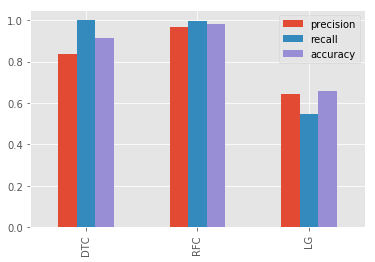

In [29]:
# Визуализировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)

## Your Code Here

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df1 = pd.DataFrame([[precision_score(y_test1, predict_dtc), recall_score(y_test1, predict_dtc), accuracy_score(y_test1, predict_dtc)], [precision_score(y_test1, predict_rfc), recall_score(y_test1, predict_rfc), accuracy_score(y_test1, predict_rfc)], [precision_score(y_test1, predict_lr), recall_score(y_test1, predict_lr), accuracy_score(y_test1, predict_lr)]], columns=['precision', 'recall', 'accuracy'], index=['DTC', 'RFC', 'LG'])
df1.plot.bar();


ROC AUC для модели DTC:  0.9198946972546069
ROC AUC для модели RFC:  0.999578576852491
ROC AUC для модели LR:  0.7124104411648458


(-0.01, 1.01)

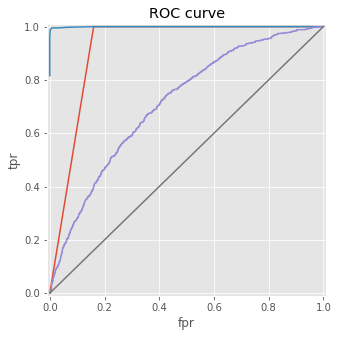

In [30]:
# Потроить roc-кривые всех моделей на одном графике
# Вывести roc_auc каждой моделей

## Your Code Here
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
plt.figure(figsize=(5, 5))

fpr, tpr, thresholds = roc_curve(y_test1, predict_dtc_proba[:,1])
plt.plot(fpr, tpr)
print('ROC AUC для модели DTC: ', roc_auc_score(y_test1, predict_dtc_proba[:,1]))

fpr, tpr, thresholds = roc_curve(y_test1, predict_rfc_proba[:,1])
plt.plot(fpr, tpr)
print('ROC AUC для модели RFC: ', roc_auc_score(y_test1, predict_rfc_proba[:,1]))

fpr, tpr, thresholds = roc_curve(y_test1, predict_lr_proba[:,1])
plt.plot(fpr, tpr)
print('ROC AUC для модели LR: ', roc_auc_score(y_test1, predict_lr_proba[:,1]))

plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [31]:
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

## Your Code Here
cross_val_score(DecisionTreeClassifier(), X, y, scoring='roc_auc', cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=123).split(X, y))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


array([0.93815201, 0.94258016, 0.93512304, 0.93064877, 0.93661447,
       0.9388516 , 0.92915735, 0.93698732, 0.93475019, 0.9354959 ])

In [32]:
cross_val_score(RandomForestClassifier(), X, y, scoring='roc_auc', cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=123).split(X, y))

array([1.        , 0.99999657, 0.99999417, 0.99998834, 0.99999554,
       0.99998834, 0.99999383, 0.99999108, 0.99998971, 0.99999074])

In [33]:
cross_val_score(LogisticRegression(), X, y, scoring='roc_auc', cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=123).split(X, y))

array([0.71148883, 0.72018248, 0.71023217, 0.69117226, 0.72523834,
       0.69502157, 0.67354135, 0.70270302, 0.697293  , 0.6788807 ])

(-0.01, 1.01)

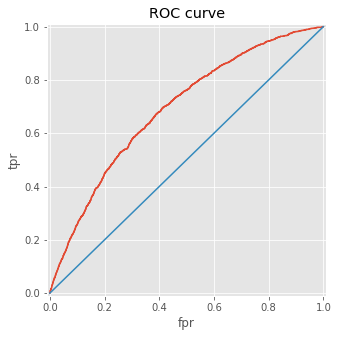

In [34]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки
## Your Code Here
predict_lr_proba = lr.predict_proba(X_test)
plt.figure(figsize=(5, 5))
fpr, tpr, thresholds = roc_curve(y_test, predict_lr_proba[:,1])
plt.plot(fpr, tpr)

plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [35]:
# Померить roc_auc на тесте
print('ROC AUC для модели LR: ', roc_auc_score(y_test, predict_lr_proba[:,1]))

ROC AUC для модели LR:  0.6898219279201042
